In [1]:
#Numpy - for math operations
import numpy as np

#Pandas- for Data manipulation and analysis.
import pandas as pd

#Matplotlib- For Data Visualization
import matplotlib.pyplot as plt

#Seaborn-For Data Visualization
import seaborn as sns

#warnings-For avoid warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
#reading the dataset
df=pd.read_csv('/kaggle/input/diabetes-prediction-dataset/diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [3]:
df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [4]:
#Statistical Summary.
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


<Axes: >

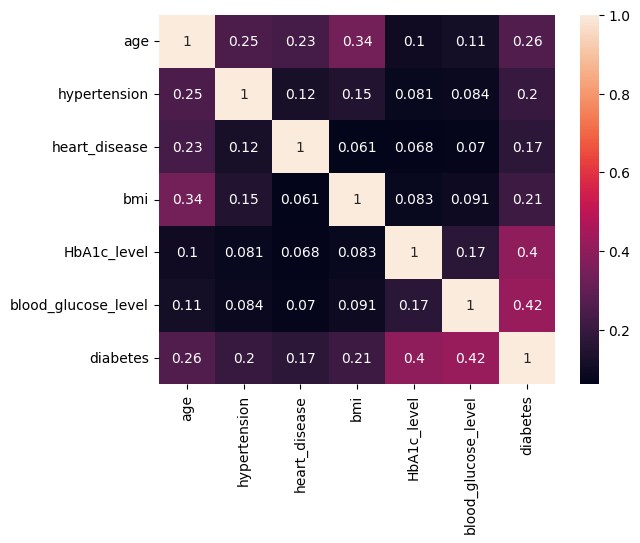

In [5]:
non_numeric_columns = df.select_dtypes(exclude=[np.number]).columns

# Exclude non-numeric columns from the correlation matrix
numeric_df = df.drop(columns=non_numeric_columns)

# Create the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True)


In [6]:
#checking for duplicate records
df[df.duplicated()]

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
2756,Male,80.0,0,0,No Info,27.32,6.6,159,0
3272,Female,80.0,0,0,No Info,27.32,3.5,80,0
3418,Female,19.0,0,0,No Info,27.32,6.5,100,0
3939,Female,78.0,1,0,former,27.32,3.5,130,0
3960,Male,47.0,0,0,No Info,27.32,6.0,200,0
...,...,...,...,...,...,...,...,...,...
99980,Female,52.0,0,0,never,27.32,6.1,145,0
99985,Male,25.0,0,0,No Info,27.32,5.8,145,0
99989,Female,26.0,0,0,No Info,27.32,5.0,158,0
99990,Male,39.0,0,0,No Info,27.32,6.1,100,0


In [7]:
#droping duplicate records
df.drop_duplicates(keep='first', inplace=True)

In [8]:
df.drop('smoking_history',axis=1, inplace=True)

In [9]:
df.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,25.19,6.6,140,0
1,Female,54.0,0,0,27.32,6.6,80,0
2,Male,28.0,0,0,27.32,5.7,158,0
3,Female,36.0,0,0,23.45,5.0,155,0
4,Male,76.0,1,1,20.14,4.8,155,0


In [10]:
#checking for null values
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [11]:
df.gender.value_counts()

gender
Female    56161
Male      39967
Other        18
Name: count, dtype: int64

In [12]:
df.diabetes.value_counts(normalize=True)*100

diabetes
0    91.178
1     8.822
Name: proportion, dtype: float64

In [13]:
df.diabetes.value_counts()

diabetes
0    87664
1     8482
Name: count, dtype: int64

In [14]:
df[df['gender']=='Other']

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
12669,Other,10.0,0,0,14.09,5.0,140,0
14838,Other,19.0,0,0,27.32,5.7,158,0
16702,Other,39.0,0,0,31.24,6.2,85,0
18691,Other,10.0,0,0,16.59,6.1,160,0
23266,Other,23.0,0,0,24.23,6.1,140,0
31985,Other,53.0,0,0,27.32,6.6,160,0
33805,Other,45.0,0,0,27.32,4.0,159,0
34929,Other,47.0,0,0,36.76,6.6,90,0
35006,Other,47.0,0,0,36.76,3.5,200,0
40337,Other,18.0,0,0,30.19,6.1,90,0


In [15]:
#replacing other to female
df.gender.replace('Other','Female',inplace=True)

In [16]:
df.gender.value_counts()

gender
Female    56179
Male      39967
Name: count, dtype: int64

In [17]:
df.diabetes.value_counts()

diabetes
0    87664
1     8482
Name: count, dtype: int64

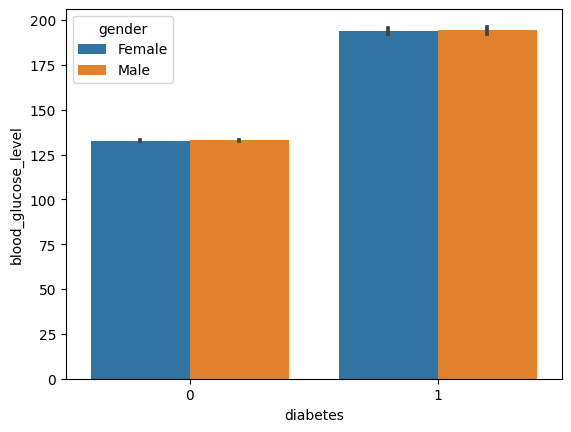

In [18]:
sns.barplot(x="diabetes",y="blood_glucose_level",hue="gender",data=df)
plt.show()

as blood glucose level increases chances of getting diabetes also increases

In [19]:
df.groupby(['gender','diabetes'])[['age']].describe()

age                                                    
                   count       mean        std   min   25%   50%   75%   max
gender diabetes                                                             
Female 0         51732.0  40.735920  21.596988  0.08  24.0  41.0  57.0  80.0
       1          4447.0  60.947380  14.894589  4.00  52.0  62.0  73.0  80.0
Male   0         35932.0  38.801977  23.059390  0.08  19.0  40.0  57.0  80.0
       1          4035.0  60.902354  14.152172  3.00  52.0  62.0  72.0  80.0

<Axes: xlabel='diabetes', ylabel='age'>

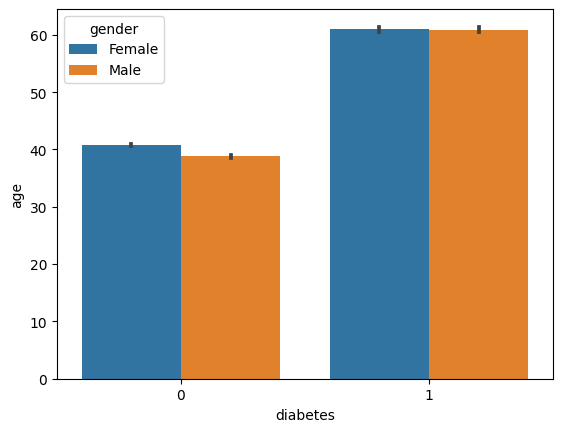

In [20]:
sns.barplot(x="diabetes",y="age",hue="gender",data=df)

after the age of 40 there are high chances of getting diabetes

<Axes: xlabel='hypertension', ylabel='age'>

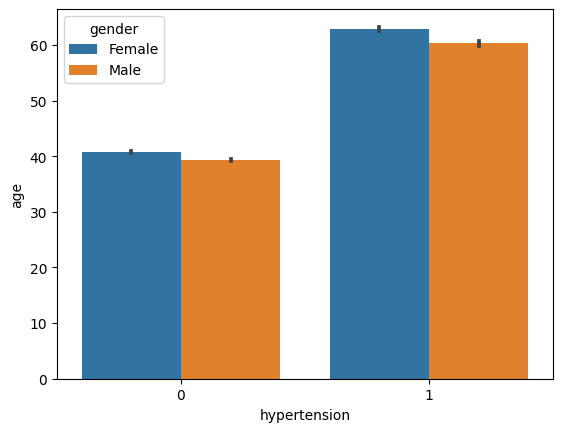

In [21]:
sns.barplot(x="hypertension",y="age",hue="gender",data=df)

after the age of 40 there are high chances of getting hypertension

In [22]:
#onehot encodding to convert catagorical data to numerical data
df1 = pd.get_dummies(df,drop_first=True)

In [23]:
df1.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male
0,80.0,0,1,25.19,6.6,140,0,False
1,54.0,0,0,27.32,6.6,80,0,False
2,28.0,0,0,27.32,5.7,158,0,True
3,36.0,0,0,23.45,5.0,155,0,False
4,76.0,1,1,20.14,4.8,155,0,True


In [24]:
#model training
# Separate object for target feature 
y = df1["diabetes"]

# Separate object for Predictors 
X = df1.drop("diabetes",axis=1)

In [25]:
X.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Male
0,80.0,0,1,25.19,6.6,140,False
1,54.0,0,0,27.32,6.6,80,False
2,28.0,0,0,27.32,5.7,158,True
3,36.0,0,0,23.45,5.0,155,False
4,76.0,1,1,20.14,4.8,155,True


In [26]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: diabetes, dtype: int64

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve,roc_auc_score

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=15)

In [29]:
LR=LogisticRegression()
LR.fit(X_train,y_train)

LogisticRegression()

In [30]:
y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_test)

In [31]:
from sklearn.metrics import confusion_matrix,classification_report

In [32]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     61372
           1       0.85      0.62      0.72      5930

    accuracy                           0.96     67302
   macro avg       0.91      0.80      0.85     67302
weighted avg       0.95      0.96      0.95     67302



In [33]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     26292
           1       0.85      0.64      0.73      2552

    accuracy                           0.96     28844
   macro avg       0.91      0.82      0.86     28844
weighted avg       0.96      0.96      0.96     28844



In [34]:
#balancing the dataset
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN

In [35]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(X,y)

In [36]:
#now after using smote technique the data is balanced
y_resampled.value_counts(normalize=True)*100

diabetes
1    51.57191
0    48.42809
Name: proportion, dtype: float64

In [37]:
y_resampled.value_counts()

diabetes
1    82464
0    77437
Name: count, dtype: int64

In [38]:
df.shape #before resampling

(96146, 8)

In [39]:
y_resampled.shape

(159901,)

In [40]:
X_train,X_test,y_train,y_test = train_test_split(X_resampled,y_resampled,test_size=0.3,random_state=20)

In [41]:
y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_test)

In [42]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83     54150
           1       0.99      0.62      0.77     57780

    accuracy                           0.80    111930
   macro avg       0.85      0.81      0.80    111930
weighted avg       0.86      0.80      0.80    111930



In [43]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83     23287
           1       0.99      0.62      0.77     24684

    accuracy                           0.80     47971
   macro avg       0.85      0.81      0.80     47971
weighted avg       0.86      0.80      0.80     47971



In [44]:
print(confusion_matrix(y_train,y_train_pred))

[[53944   206]
 [21782 35998]]


In [45]:
print(confusion_matrix(y_test,y_test_pred))

[[23190    97]
 [ 9284 15400]]
